# Khám phá dữ liệu qua các câu hỏi và câu trả lời


In [1]:
# import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install geopandas
import geopandas as gpd
%pip install mapclassify
import mapclassify


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Đọc dữ liệu đã tiền xử lý ở phần trước
df = pd.read_csv('../data/cleaned_dataset.csv')
df.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
1103,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,Dưới 1 năm,Khách sạn - Nhà hàng - Du lịch/Bán hàng - Kinh...,10 - 150 người,Công ty trách nhiệm hữu hạn,7.0,20.0,13.5,23.0,35.0,29.0
2282,Hà Nam,2.0,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,1 năm,Marketing/Truyền hình - Báo chí - Biên tập,10 - 150 người,Công ty cổ phần,8.0,12.0,10.0,24.0,37.0,30.5
3949,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,5,Toàn thời gian cố định,Trung học,Chưa có kinh nghiệm,Tài chính - Đầu tư - Chứng Khoán/Ngân hàng,Trên 300 người,Công ty trách nhiệm hữu hạn,12.0,17.0,14.5,18.0,20.0,19.0
3616,Hà Nội,2.4,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,2 năm,Kế toán/Xây dựng,10 - 150 người,Công ty cổ phần,10.0,14.0,12.0,23.0,32.0,27.5
3189,Hà Nội,2.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian tạm thời,Cao đẳng,2 năm,Bán hàng - Kinh doanh/Xây dựng/Quản lý dự án,Trên 300 người,Công ty trách nhiệm hữu hạn,10.0,15.0,12.5,23.0,40.0,31.5


## 1. Khám phá dữ liệu

- Các ngành nghề đăng tin tuyển dụng là các ngành nào?

In [3]:
carreer = pd.Series(df['Ngành nghề'].str.split('/').explode().str.strip())
num_carreer = carreer.nunique()
print('Số ngành nghề: ', num_carreer)
carreer_value = pd.DataFrame(carreer.value_counts())
carreer_value.reset_index(inplace=True)
carreer_value.columns = ['Ngành nghề', 'Số lượng']
carreer_value

Số ngành nghề:  53


,Ngành nghề,Số lượng
0,Bán hàng - Kinh doanh,1648
1,Chăm sóc khách hàng,703
2,Kế toán,690
3,Bán sỉ - Bán lẻ - Quản lý cửa hàng,625
4,Hành chính - Thư ký,593
5,Marketing,524
6,Khoa học - Kỹ thuật,446
7,Xây dựng,399
8,Tài chính - Đầu tư - Chứng Khoán,345
9,Kiểm toán,322


- Xét 10 ngành nghề có số lượng công việc tuyển cao nhất

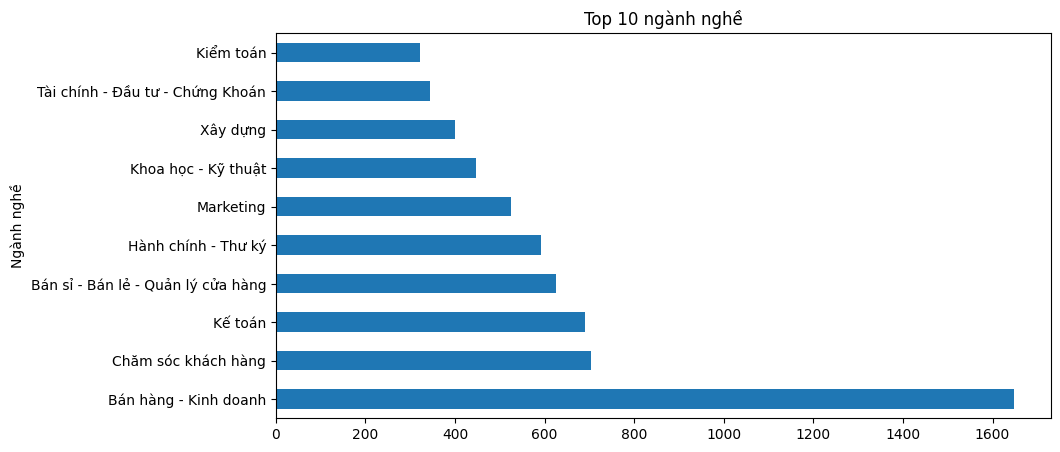

In [4]:
top10_carreer = carreer.value_counts().head(10)
top10_carreer.plot(kind='barh', figsize=(10, 5), title='Top 10 ngành nghề');

- Các công việc này sẽ có yêu cầu bằng cấp như thế nào?

In [5]:
degree_requirements = pd.DataFrame(df['Yêu cầu bằng cấp'].value_counts())
degree_requirements.reset_index(inplace=True)
degree_requirements.columns = ['Yêu cầu bằng cấp', 'Số lượng']
degree_requirements

,Yêu cầu bằng cấp,Số lượng
0,Cao đẳng,1731
1,Đại học,923
2,Trung cấp,917
3,Không,590
4,Trung học,512
5,Chứng chỉ,62
6,Trên đại học,4


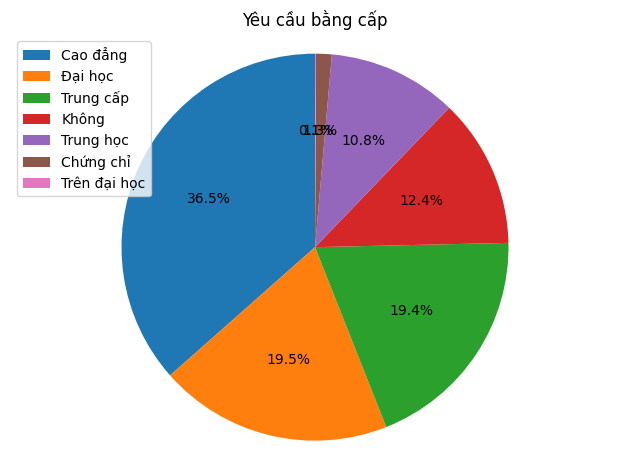

In [6]:
labels = degree_requirements['Yêu cầu bằng cấp']
sizes = degree_requirements['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu bằng cấp')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Các công việc này có yêu cầu về kinh nghiệm làm việc không?

In [7]:
exp_requirements = pd.DataFrame(df['Yêu cầu kinh nghiệm'].value_counts())
exp_requirements.reset_index(inplace=True)
exp_requirements.columns = ['Yêu cầu kinh nghiệm', 'Số lượng']
exp_requirements

,Yêu cầu kinh nghiệm,Số lượng
0,1 năm,1688
1,Chưa có kinh nghiệm,1054
2,2 năm,812
3,Dưới 1 năm,703
4,3 năm,359
5,5 năm,78
6,Hơn 5 năm,23
7,4 năm,22


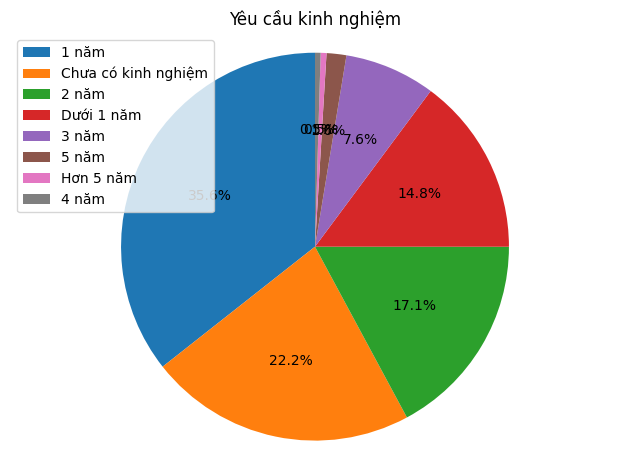

In [8]:
labels = exp_requirements['Yêu cầu kinh nghiệm']
sizes = exp_requirements['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu kinh nghiệm')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Các cấp bậc tuyển là các cấp bậc nào?

In [9]:
level_df = pd.DataFrame(df['Cấp bậc'].value_counts())
level_df.reset_index(inplace=True)
level_df.columns = ['Cấp bậc', 'Số lượng']
level_df

,Cấp bậc,Số lượng
0,Chuyên viên- nhân viên,4153
1,Quản lý nhóm- giám sát,267
2,Quản lý cấp trung,152
3,Cộng tác viên,134
4,Chuyên gia,16
5,Quản lý cấp cao,16
6,Chưa cập nhật,1


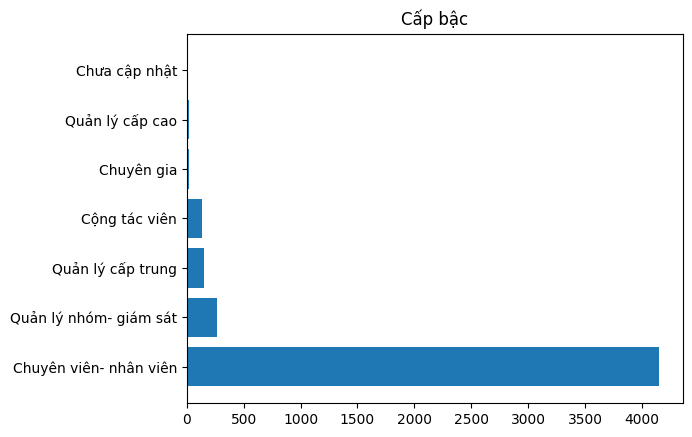

In [10]:
labels = level_df['Cấp bậc']
sizes = level_df['Số lượng']
plt.barh(labels, sizes)
plt.title('Cấp bậc')
plt.show()

- Yêu cầu về giới tính của các công việc

In [11]:
gender_df = pd.DataFrame(df['Yêu cầu giới tính'].value_counts())
gender_df.reset_index(inplace=True)
gender_df.columns = ['Giới tính', 'Số lượng']
gender_df

,Giới tính,Số lượng
0,Không yêu cầu,3043
1,Nam,1040
2,Nữ,656


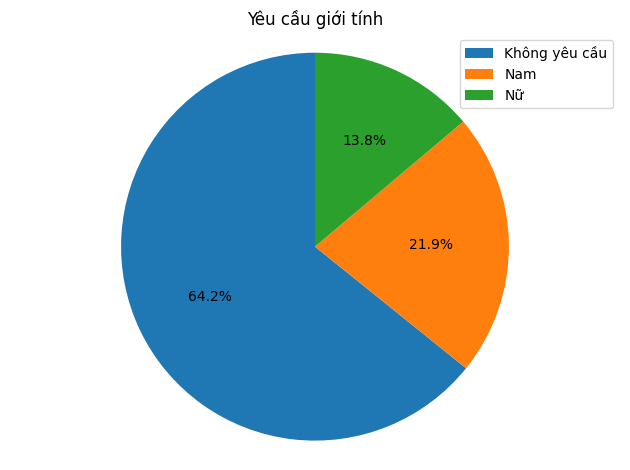

In [12]:
labels = gender_df['Giới tính']
sizes = gender_df['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu giới tính')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Độ tuổi trung bình tuyển nhân sự của các công việc 

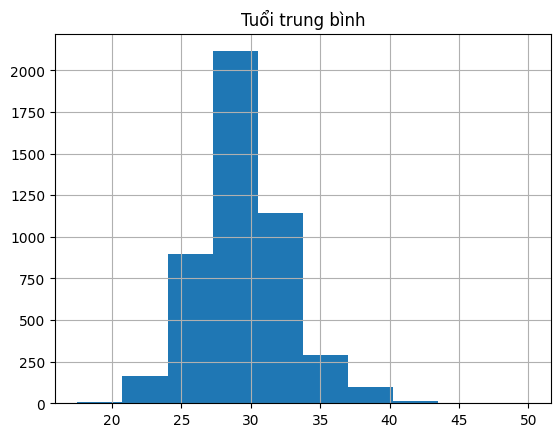

In [13]:
avg_age_df = pd.DataFrame(df['Tuổi trung bình'])
avg_age_df.hist(bins=10)
plt.title('Tuổi trung bình')
plt.show()

In [14]:
area_df = pd.Series(df['Khu vực tuyển']).str.split(',').explode().str.strip()
area_df = pd.DataFrame(area_df.value_counts())
area_df.reset_index(inplace=True)
area_df.columns = ['Khu vực', 'Số lượng']
area_df

,Khu vực,Số lượng
0,TP.HCM,2348
1,Hà Nội,1244
2,Bình Dương,379
3,Đồng Nai,159
4,Long An,149
...,...,...
59,Yên Bái,3
60,Hà Giang,2
61,Bắc Kạn,1
62,Nước ngoài,1


- Xét 10 khu vực có số lượng công việc tuyển nhiều nhất

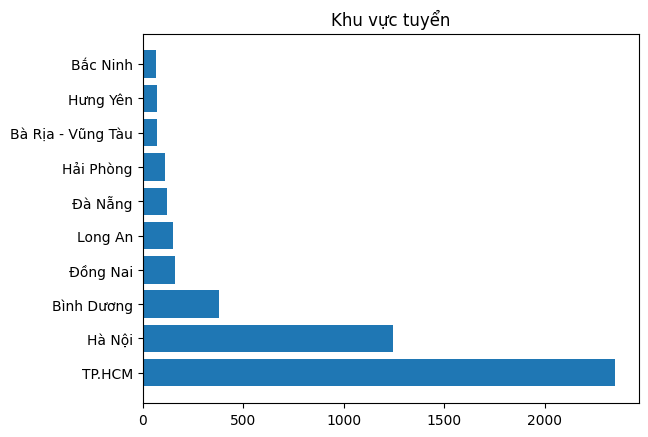

In [15]:
labels = area_df['Khu vực'].head(10)
sizes = area_df['Số lượng'].head(10)
plt.barh(labels, sizes)
plt.title('Khu vực tuyển')
plt.show()

['Kiên Giang', 'Quảng Ninh', 'Bình Phước', 'Bình Thuận', 'Cà Mau', 'Hòa Bình', 'Bình Dương', 'Sóc Trăng', 'Ninh Thuận', 'Đắk Lắk', 'Hưng Yên', 'Lào Cai', 'Long An', 'Phú Thọ', 'Bắc Giang', 'Bắc Ninh', 'Cao Bằng', 'Đăk Nông', 'Hà Nam', 'Tiền Giang', 'Thái Nguyên', 'Hải Dương', 'Tây Ninh', 'Đà Nẵng', 'Thái Bình', 'Ninh Bình', 'Bạc Liêu', 'Đồng Nai', 'Nam Định', 'Trà Vinh', 'Bà Rịa - Vũng Tàu', 'Đồng Tháp', 'Kon Tum', 'Lai Châu', 'Lâm Đồng', 'Gia Lai', 'Lạng Sơn', 'Yên Bái', 'Bắc Kạn', 'Vĩnh Phúc', 'Nghệ An', 'Điện Biên', 'Hậu Giang', 'Vĩnh Long', 'Tuyên Quang', 'Quảng Ngãi', 'An Giang', 'Bình Định', 'Quảng Trị', 'Bến Tre', 'Cần Thơ', 'Hà Giang', 'TP.HCM', 'Hải Phòng', 'Hà Nội', 'Hà Tĩnh', 'Khánh Hòa', 'Quảng Bình', 'Thừa Thiên Huế', 'Thanh Hóa', 'Sơn La', 'Quảng Nam', 'Phú Yên']


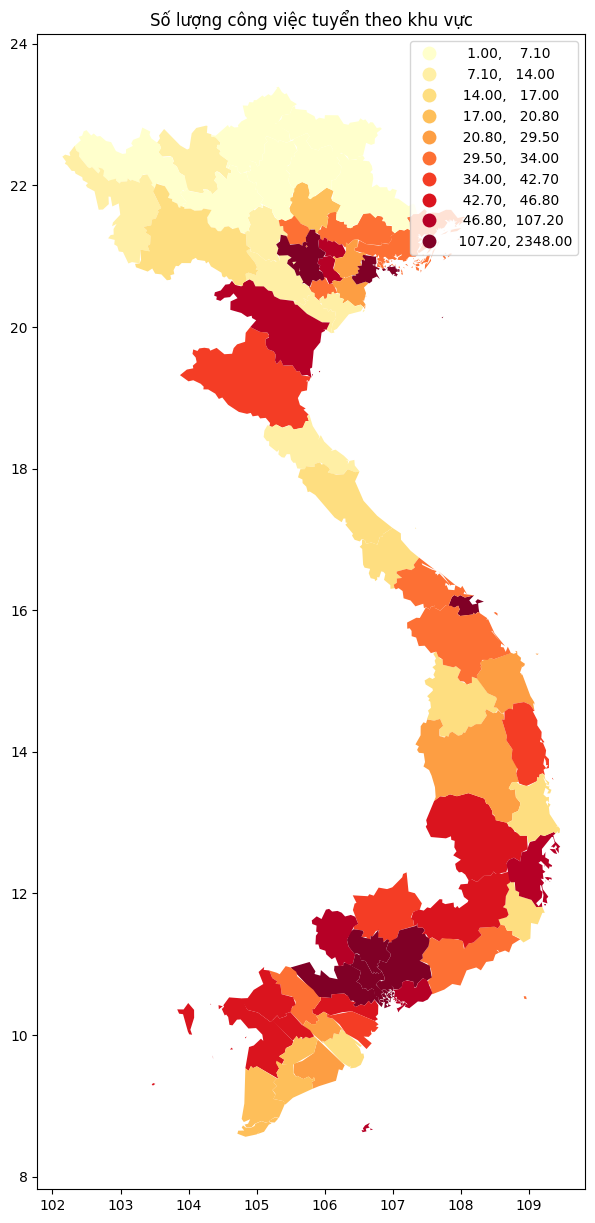

In [16]:
# Đọc bản đồ
vietnam_map = gpd.read_file('../data/vietnam.geojson')
# Chuẩn hóa tên tỉnh thành
vietnam_map = vietnam_map.replace({"Hồ Chí Minh city": "TP.HCM"})
vietnam_map = vietnam_map.replace({"Thừa Thiên - Huế": "Thừa Thiên Huế"})
print(list(vietnam_map['name']))
# Merge dữ liệu
merged = vietnam_map.set_index('name').join(area_df.set_index('Khu vực'))

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 15)
merged.plot(column='Số lượng', ax=ax, legend=True, cmap='YlOrRd', scheme='quantiles', k=10)
plt.title('Số lượng công việc tuyển theo khu vực')
plt.show()

## 2. Đặt câu hỏi và trả lời

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 1. Ngành nghề nào có nhiều công việc với mức lương cao nhất?
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Giúp người quan tâm về vấn đề tuyển dụng biết được nhu cầu việc làm của các ngành nghề đối với các công việc có mức lương cao</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">
* Có 3 bước:
    * *Bước 1*: Lọc ra các công việc có thu nhập cao (ngưỡng là phân vị 75% mức lương trung bình)
    
    * *Bước 2*: Tính tỉ lệ công việc lương cao ở các ngành nghề, vẽ biểu đồ top 10

    * *Bước 3*: Trực quan hoá
<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">Biểu đồ cột và đường thể hiện ngành nghề có có tỉ lệ mức lương cao là lớn nhất</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 1: Lọc ra các công việc có thu nhập cao
</b></font>


</div>

In [17]:
upper_quartile = df['Mức lương trung bình'].quantile(0.75)
print(f"Giá trị ngưỡng: {upper_quartile} triệu")
df_highsalary = df[df['Mức lương trung bình'] >= upper_quartile]

Giá trị ngưỡng: 15.0 triệu


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 2: Tính tỉ lệ công việc lương cao ở các ngành nghề, vẽ biểu đồ top 10
</b></font>


</div>

In [18]:
#Tổng số lượng tuyển dụng trong các ngành
df_exp = df.copy()
df_exp['Ngành nghề'] = df_exp['Ngành nghề'].str.split('/')
df_exp = df_exp.explode('Ngành nghề')
df_exp.reset_index(inplace=True)
df_exp.drop(columns=['index'], inplace=True)
df_copy_grouped = df_exp.groupby('Ngành nghề')['Số lượng tuyển'].sum()
df_copy_grouped = pd.DataFrame(df_copy_grouped)
df_copy_grouped.head()

,Số lượng tuyển
Ngành nghề,
An ninh - Bảo vệ,1038
An toàn lao động,52
Biên phiên dịch,486
Bán hàng - Kinh doanh,9473
Bán sỉ - Bán lẻ - Quản lý cửa hàng,3444


In [19]:
#Số lượng tuyển có mức lương cao trong các ngành
df_highsalary.loc[:, 'Ngành nghề'] = df_highsalary['Ngành nghề'].str.split('/')
df_highsalary = df_highsalary.explode('Ngành nghề')
df_highsalary.reset_index(inplace=True)
df_highsalary.drop(columns=['index'], inplace=True)
df_highsalary_grouped = df_highsalary.groupby('Ngành nghề')['Số lượng tuyển'].sum()
df_highsalary_grouped = pd.DataFrame(df_highsalary_grouped)
df_highsalary_grouped.head(10)

,Số lượng tuyển
Ngành nghề,
An ninh - Bảo vệ,3
An toàn lao động,16
Biên phiên dịch,160
Bán hàng - Kinh doanh,3143
Bán sỉ - Bán lẻ - Quản lý cửa hàng,1051
Bưu chính viễn thông,29
Bảo hiểm,119
Bất động sản,87
Chăm sóc khách hàng,1532


In [20]:
#Tính tỉ lệ công việc lương cao trong các ngành
df_highsalary = pd.merge(df_highsalary_grouped, df_copy_grouped, on='Ngành nghề')
df_highsalary.reset_index(inplace=True)
df_highsalary.columns = ['Ngành nghề', 'Số lượng tuyển lương cao', 'Tổng số lượng tuyển']
df_highsalary['Tỉ lệ công việc lương cao'] = df_highsalary['Số lượng tuyển lương cao'] / df_highsalary['Tổng số lượng tuyển']*100
df_highsalary.sort_values(by='Tỉ lệ công việc lương cao', ascending=False, inplace=True)
df_highsalary.reset_index(inplace=True)
df_highsalary.drop(columns=['index'], inplace=True)
df_highsalary.drop(columns=['Số lượng tuyển lương cao'], inplace=True)
df_highsalary.head()


,Ngành nghề,Tổng số lượng tuyển,Tỉ lệ công việc lương cao
0,Khai thác năng lượng - Khoáng sản - Địa chất,18,61.111111
1,Quản lý dự án,343,58.017493
2,Chăn nuôi - Thú y,68,52.941176
3,Bảo hiểm,236,50.423729
4,Luật - Pháp Lý - Tuân thủ,238,49.159664


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 3: Trực quan hoá
</b></font>


</div>

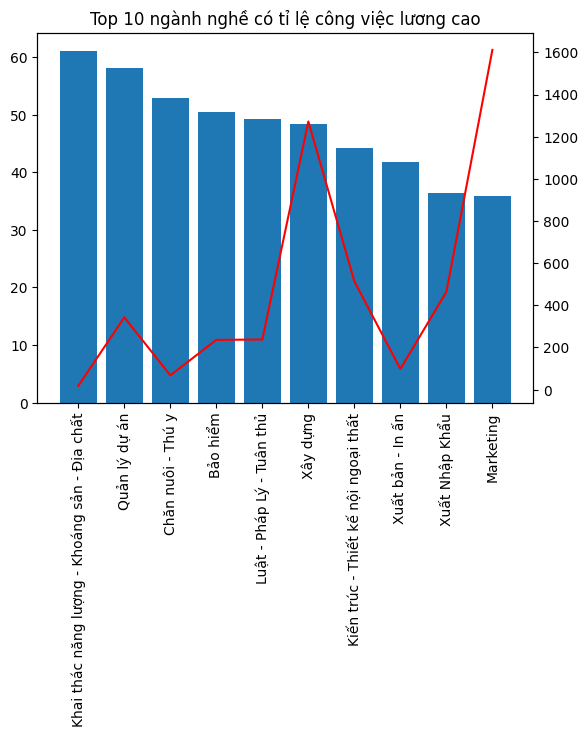

In [21]:
#Vẽ biểu đồ
fig, ax = plt.subplots()
ax.bar(df_highsalary['Ngành nghề'].head(10), df_highsalary['Tỉ lệ công việc lương cao'].head(10))
ax2 = ax.twinx()
ax2.plot(df_highsalary['Ngành nghề'].head(10), df_highsalary['Tổng số lượng tuyển'].head(10), color = 'r')
ax.set_xticks(range(10))  # Set the number of x-ticks
ax.set_xticklabels(df_highsalary['Ngành nghề'].head(10), rotation='vertical')
plt.title('Top 10 ngành nghề có tỉ lệ công việc lương cao')
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">

* Marketing và xây dựng là những ngành nghề vừa có nhu cầu tuyển dụng nhiều vừa có tỉ lệ lương cao.

* Các ngành Địa chất, Chăn nuôi – Thú y, Bảo hiểm, Quản lý dự án, Xuất bản – in ấn có tỉ lệ lương rất cao nhưng lại có ít nhu cầu tuyển dụng do chuyên môn đặc thù, đòi hỏi kinh nghiệm và chuyên gia hoặc do ảnh hưởng của công nghệ.

</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 2. Có sự khác biệt trong lương đối với người có kinh nghiệm, bằng cấp khác nhau hay không ?
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Cho người tìm việc làm hiểu được nhu cầu của thị trường có phù hợp với trình độ của mình hay không</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">
* Có 3 bước:
    * *Bước 1*: Đầu tiên, ta lọc các giá trị có ít dữ liệu trong dataset, như giá trị `4 năm`, `Hơn 5 năm` trong cột `Yêu cầu kinh nghiệm` và giá trị `Trên đại học`, `Chứng chỉ` trong cột `Yêu cầu bằng cấp`
    
    * *Bước 2*: Ta sẽ xử lí lọc các giá trị ngoại lại trong cột mức lương trung bình

    * *Bước 3*: Vẽ biểu đồ boxplot cho các dữ liệu đã được lọc
<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">Biểu đồ boxplot về mức lương trung bình được groupby theo cột `Yêu cầu bằng cấp` và `Yêu cầu kinh nghiệm`</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 1: Lọc các giá trị xuất hiện rất ít trong bộ dữ liệu
</b></font>

</div>

In [22]:
# Tính IQR
df_exp = df[~df['Yêu cầu kinh nghiệm'].isin(['Hơn 5 năm', '4 năm'])]
df_degree = df[~df['Yêu cầu bằng cấp'].isin(['Chứng chỉ', 'Trên đại học'])]


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 2: Lọc các giá ngoại lại trong cột 'Mức lương trung bình'
</b></font>

</div>

In [23]:
Q1 = df_exp['Mức lương trung bình'].quantile(0.25)
Q3 = df_exp['Mức lương trung bình'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giới hạn của outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ outliers
df_avgsalary_by_exp = df_exp[(df_exp['Mức lương trung bình'] >= lower_bound) & (df_exp['Mức lương trung bình'] <= upper_bound)]

Q1 = df_degree['Mức lương trung bình'].quantile(0.25)
Q3 = df_degree['Mức lương trung bình'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_avgsalary_by_degree = df_degree[(df_degree['Mức lương trung bình'] >= lower_bound) & (df_degree['Mức lương trung bình'] <= upper_bound)]

df_avgsalary_by_degree.sample(5)


,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
677,Hà Nội,2.0,Chuyên viên- nhân viên,Nam,1,Toàn thời gian cố định,Đại học,Dưới 1 năm,Kiểm toán/Xây dựng/Thiết kế - Sáng tạo nghệ thuật,10 - 150 người,Công ty trách nhiệm hữu hạn,7.0,9.0,8.0,22.0,36.0,29.0
1788,"Hải Dương, Vĩnh Phúc, Hưng Yên, Bắc Giang",2.0,Chuyên viên- nhân viên,Nam,3,Toàn thời gian cố định,Cao đẳng,1 năm,IT Phần cứng - Mạng/Bán hàng - Kinh doanh/Chăm...,10 - 150 người,Công ty cổ phần,10.0,20.0,15.0,23.0,36.0,29.5
1678,Ninh Bình,2.0,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Điện - Điện tử - Điện lạ...,Trên 300 người,Công ty trách nhiệm hữu hạn,9.0,30.0,19.5,20.0,32.0,26.0
706,TP.HCM,2.0,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Cao đẳng,Chưa có kinh nghiệm,Marketing/Thiết kế - Sáng tạo nghệ thuật,Dưới 10 người,Công ty trách nhiệm hữu hạn,7.0,10.0,8.5,20.0,30.0,25.0
4433,TP.HCM,2.0,Quản lý cấp trung,Nữ,1,Toàn thời gian cố định,Cao đẳng,3 năm,Giáo dục - Đào tạo,10 - 150 người,Công ty cổ phần,12.0,15.0,13.5,23.0,35.0,29.0


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 3: Trực quan hoá
</b></font>


</div>

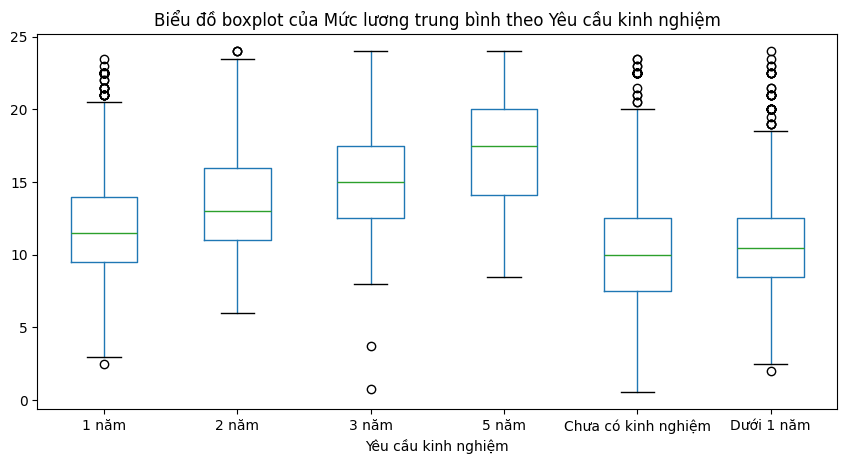

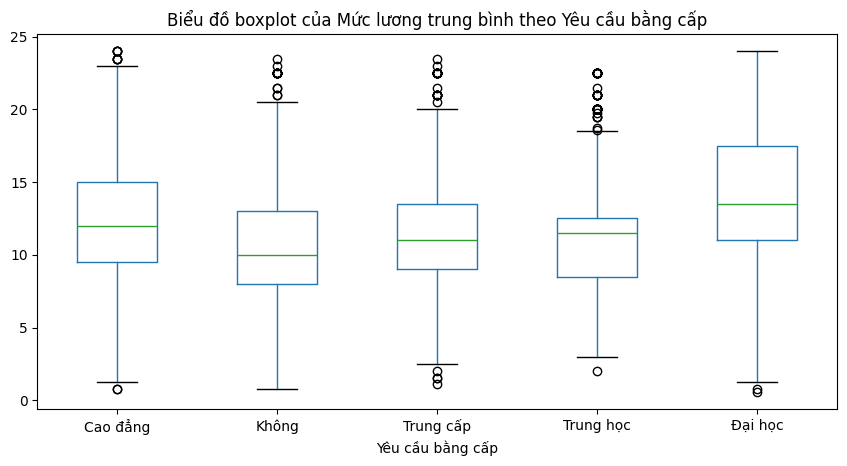

In [24]:
# Vẽ biểu đồ boxplot sau khi loại bỏ outliers
ax1 = df_avgsalary_by_exp.boxplot(column='Mức lương trung bình', by='Yêu cầu kinh nghiệm', figsize=(10, 5), grid=False)
plt.title('Biểu đồ boxplot của Mức lương trung bình theo Yêu cầu kinh nghiệm')
plt.suptitle('') # that's what you're after
plt.show()

ax2 = df_avgsalary_by_degree.boxplot(column='Mức lương trung bình', by='Yêu cầu bằng cấp', figsize=(10, 5), grid=False)
plt.title('Biểu đồ boxplot của Mức lương trung bình theo Yêu cầu bằng cấp')
plt.suptitle('') # that's what you're after
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">

* Ở biểu đồ về <b>Kinh nghiệm</b>, dễ dàng nhận thấy với kinh nghiệm càng cao thì mức lương nhận được càng cao
* Ở biểu đồ về <b>Bằng cấp</b>, với bằng đại học thì mức lương được trỉa rộng nhất và cao nhất, các bằng cấp còn lại không khác biệt nhiều

</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 3. Khác biệt trong nhu cầu tuyển dụng ở các tỉnh thành khác nhau ?
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Cho người tìm việc làm hiểu được nhu cầu của thị trường ở các địa phương cụ thể</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">
* Có 3 bước:

    *  *Bước 1*: Lần lượt tách tất cả các hàng dữ liệu khi tại hàng đó và cột cụ thể có chứa hơn 1 giá trị, ví dụ ở cột `Khu vực tuyển` có các hàng có giá trị là nhiều hơn 1 tỉnh, để làm việc này, nhóm sẽ tách các giá trị ở các hàng trong một cột theo giá trị ngăn cách như `/` hoặc `, `. Sau đó sẽ explode theo cột.

    *  *Bước 2*: Gom nhóm theo các cột dữ liệu `Khu vực tuyển`, `Ngành nghề`,và tính tổng ở cột `Số lượng tuyển` sau đó so sánh số lượng tuyển các ngành ở các tỉnh thành cụ thể. Ở đây nhóm sẽ xem xét ở 5 khu vực tuyển có số lượng tuyển nhiều nhất

    * *Bước 3*: Vẽ 5 biểu đồ cột để so sánh, vì có rất nhiều ngành nghề nên nhóm chỉ trực quan ở 5 ngành nghề có số lượng tuyển cao nhất<font color="red"></font>

<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">5 biểu đồ cột đôi so sánh số lượng tuyển của các ngành nghề</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 1: Tách các cột dữ liệu
</b></font>


</div>

In [25]:
df_carreer=df.copy()
df_carreer['Ngành nghề'] = df_carreer['Ngành nghề'].str.split('/')
df_carreer = df_carreer.explode('Ngành nghề').reset_index(drop=True)
df_carreer['Khu vực tuyển'] = df_carreer['Khu vực tuyển'].str.split(', ')
df_carreer = df_carreer.explode('Khu vực tuyển').reset_index(drop=True)
df_carreer.sample(5)


,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
10987,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,3,Toàn thời gian cố định,Trung cấp,1 năm,Dược phẩm,10 - 150 người,Công ty trách nhiệm hữu hạn,7.0,20.0,13.5,23.0,34.0,28.5
9485,Bắc Giang,2.0,Chuyên viên- nhân viên,Không yêu cầu,3,Toàn thời gian cố định,Trung học,Chưa có kinh nghiệm,Bán hàng - Kinh doanh,Trên 300 người,Công ty trách nhiệm hữu hạn,8.0,15.0,11.5,18.0,30.0,24.0
8531,Khánh Hòa,2.0,Chuyên viên- nhân viên,Không yêu cầu,50,Toàn thời gian cố định,Trung học,Chưa có kinh nghiệm,Tài chính - Đầu tư - Chứng Khoán,Trên 300 người,Công ty trách nhiệm hữu hạn,12.0,20.0,16.0,23.0,31.0,27.0
6859,Hà Nội,1.9,Chuyên viên- nhân viên,Nam,10,Toàn thời gian cố định,Trung học,2 năm,Vận hành - Bảo trì - Bảo dưỡng,150 - 300 người,Công ty trách nhiệm hữu hạn,9.0,12.0,10.5,24.0,36.0,30.0
1366,TP.HCM,3.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Đại học,3 năm,Bán hàng - Kinh doanh,10 - 150 người,Công ty trách nhiệm hữu hạn,9.0,15.0,12.0,25.0,30.0,27.5


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 2: Gom nhóm dữ liệu
</b></font>


</div>

In [26]:
df_carreer=df_carreer.groupby(['Khu vực tuyển','Ngành nghề'])['Số lượng tuyển'].sum()
df_carreer
df_carreer_copy = df_carreer.reset_index()
df_carreer_copy.sample(10)

,Khu vực tuyển,Ngành nghề,Số lượng tuyển
86,Bình Dương,Kiến trúc - Thiết kế nội ngoại thất,34
874,Phú Thọ,Hành chính - Thư ký,4
320,Cà Mau,Y tế - Chăm sóc sức khỏe,25
1212,Trà Vinh,Lao động phổ thông,5
249,Bắc Ninh,Giáo dục - Đào tạo,2
804,Nam Định,Quản lý tiêu chuẩn và chất lượng,5
68,Bình Dương,Bán hàng - Kinh doanh,983
883,Phú Thọ,Xây dựng,2
786,Lâm Đồng,Tài chính - Đầu tư - Chứng Khoán,197
1139,Thái Nguyên,Ngân hàng,170


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 3: Trực quan hoá
</b></font>


</div>

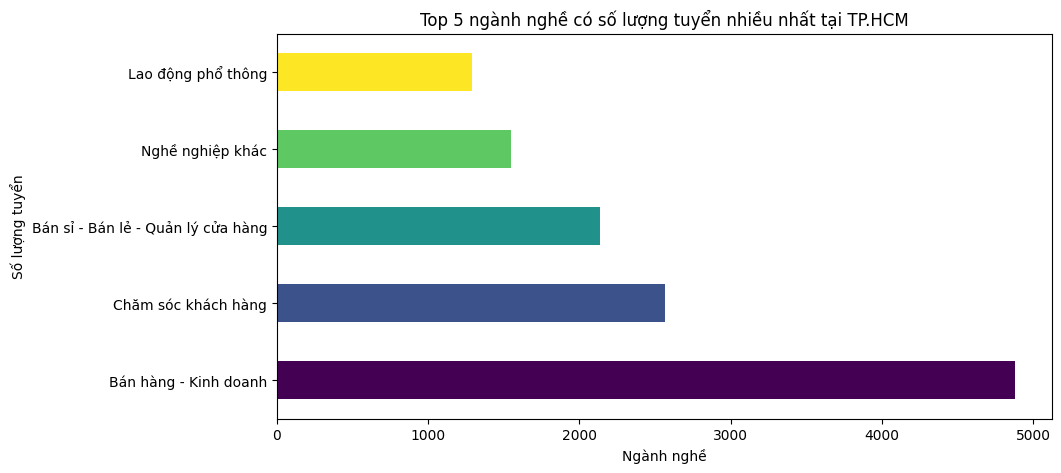

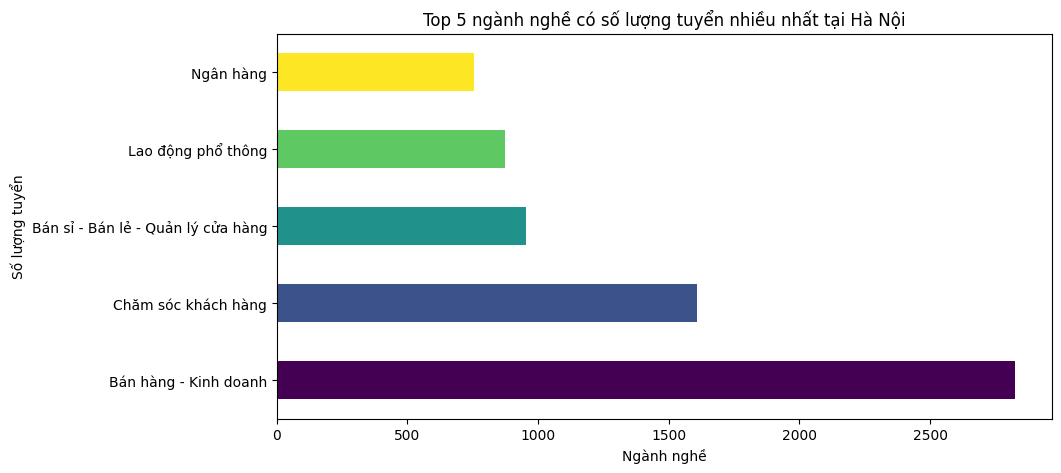

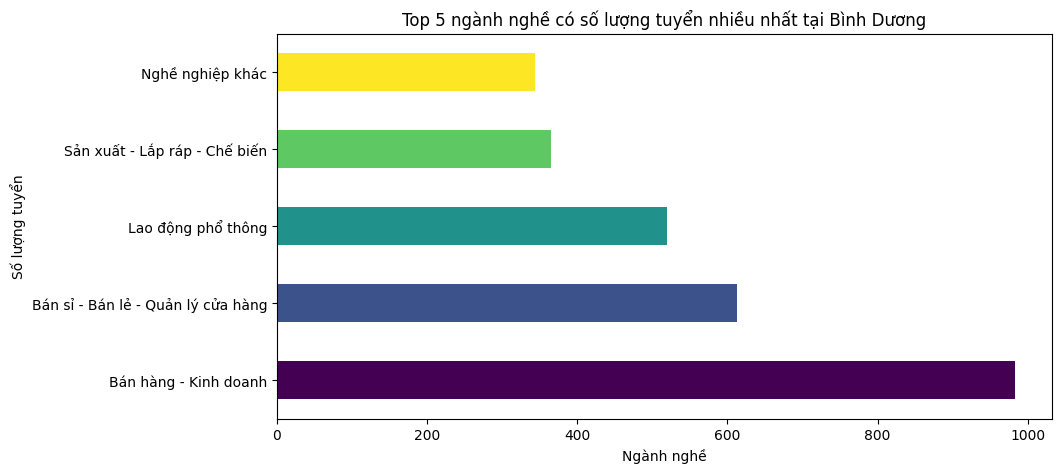

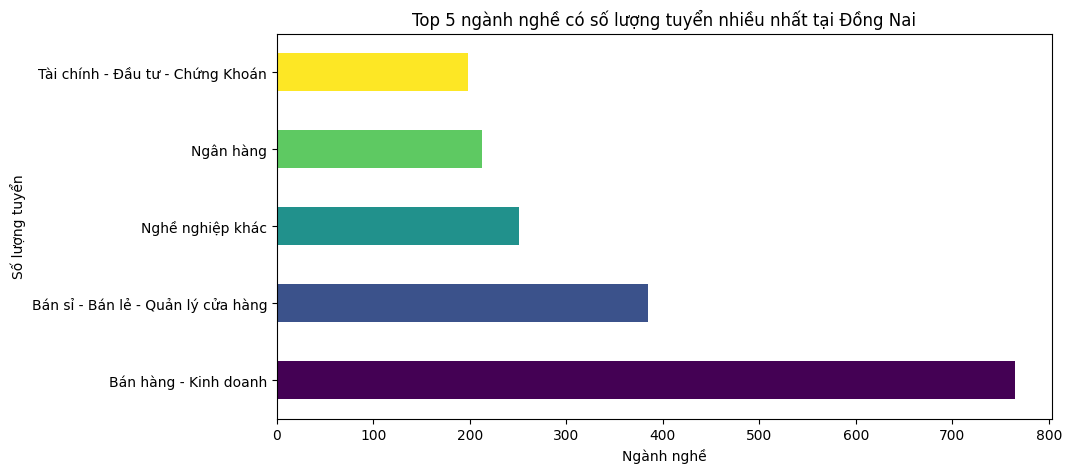

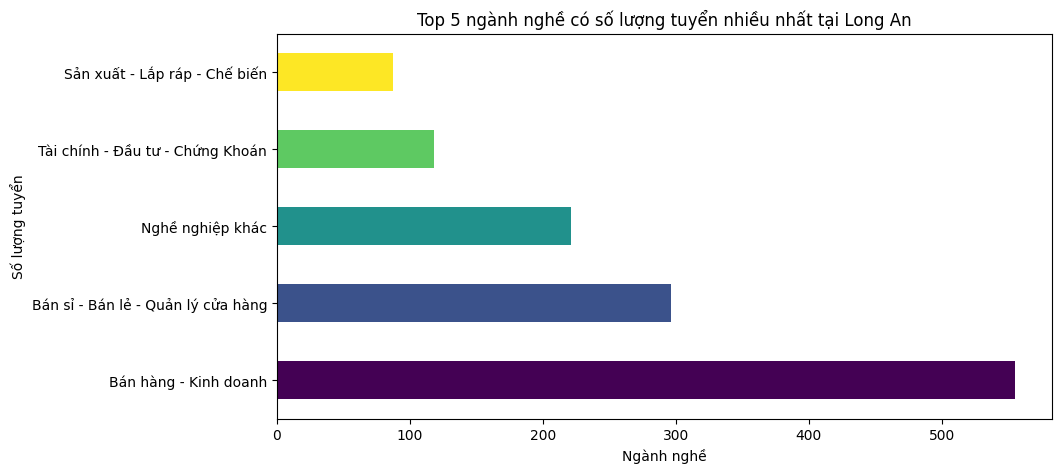

In [27]:
top5area=area_df['Khu vực'].head(5)
top5area

for area in top5area:
    # Lọc df_carreer cho mỗi khu vực
    df_carreer_filtered = df_carreer[df_carreer.index.get_level_values('Khu vực tuyển') == area]

    # Nhóm dữ liệu và tính tổng
    df_carreer_grouped = df_carreer_filtered.groupby('Ngành nghề').sum()

    # Sắp xếp dữ liệu và lấy 5 ngành nghề đầu tiên
    top5_careers = df_carreer_grouped.sort_values(ascending=False).head(5)

    # Vẽ biểu đồ cột
    colors = plt.cm.viridis(np.linspace(0, 1, len(top5_careers)))

    top5_careers.plot(kind='barh', figsize=(10, 5),color=colors)
    plt.title(f'Top 5 ngành nghề có số lượng tuyển nhiều nhất tại {area}')
    plt.xlabel('Ngành nghề')
    plt.ylabel('Số lượng tuyển')
    plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">

* Biểu đồ cho thấy giống như biểu đồ về tuyển dụng các ngành ở phần khám phá, ngành <b>Bán hàng - kinh doanh, Hành chính - Thư ký, Chăm sóc khách hàng </b> luôn có số lượng tuyển cao ở các tỉnh.

* Ngành <b>Khách sạn - Nhà hàng - Du lịch </b> xuất hiện ở 4/5 biểu đồ dù không phải nằm trong top 10 ngành có số lượng tuyển nhiều nhất cả nước

* Tại tỉnh <b>Long An</b>, <b> Nghề nghiệp khác</b> chiếm số lượng tuyển khá lớn - Đứng thứ 2 trong toàn bộ số lượng tuyển

* Các ngành nghề <b>Lao động phổ thông, Chăm sóc khách hàng</b> cũng có xuất hiện dù không nằm trong top 10 toàn quốc

</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 4. Với độ tuổi cụ thể, người lao động có thể tìm đến những việc làm nào và tiền lương có thể nhận được là bao nhiêu ?
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Giúp người lao động có thể tìm việc phù hợp với độ tuổi và lương mong muốn</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">
* Có 4 bước:

    * *Bước 1*: Xem xét biểu đố histogram của cột tuổi, tiến hành chia lại thành các nhóm tuổi `16-25`, `26-30`, `31-60` và lưu vào cột mới là `Nhóm tuổi`

    * *Bước 2*: Tách các hàng mang nhiều giá trị trong cột `Ngành nghề`, dùng explode để tách
    
    * *Bước 3*: Tạo bảng để tính số lượng cho mỗi `Ngành nghề` và `Nhóm tuổi`

    * *Bước 4*: Vẽ biểu đồ cột nhiều màu để so sánh, đồng thời biểu diễn lương trung bình bên cạnh mỗi màu trong cột<font color="red"></font>

<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">Biểu đồ cột đôi so sánh mức lương của nam và nữ trong cùng một điều kiện ở 5 ngành nghề có số lượng tuyển nhiều nhất</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 1: Xem xét histogram độ tuổi và chia lại các bins
</b></font>


</div>

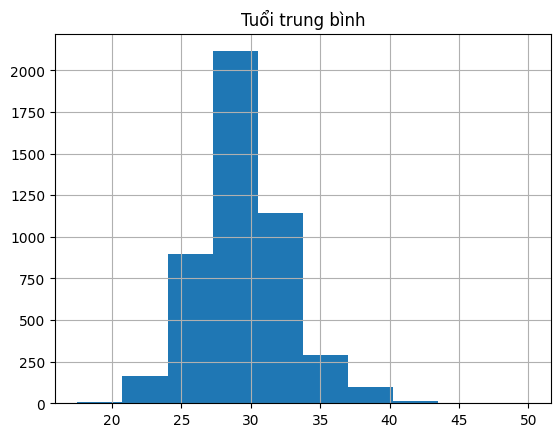

In [28]:
avg_age_df = pd.DataFrame(df['Tuổi trung bình'])
avg_age_df.hist(bins=10)
plt.title('Tuổi trung bình')
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="" color=blue>Lựa chọn các bins như sau `16-25`, `26-30`, `31-60` và lưu vào cột mới là `Nhóm tuổi`
</font>


</div>

In [29]:
df_copy=df.copy()
bins = [16, 25, 30, 60]
labels = ['16-25', '26-30', '31-60']
df_copy['Nhóm tuổi'] = pd.cut(df_copy['Tuổi trung bình'], bins=bins, labels=labels, include_lowest=True)
df_copy.sample(10)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình,Nhóm tuổi
285,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,3,Toàn thời gian cố định,Đại học,2 năm,Kế toán/Hành chính - Thư ký/Tài chính - Đầu tư...,150 - 300 người,Công ty trách nhiệm hữu hạn,10.0,14.0,12.0,21.0,31.0,26.0,26-30
4665,Hà Nội,2.0,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Điện - Điện tử - Điện lạnh/Cơ khí - Ô tô - Tự ...,Trên 300 người,Công ty cổ phần,9.5,10.5,10.0,27.0,45.0,36.0,31-60
1983,TP.HCM,1.6,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,1 năm,Sản xuất - Lắp ráp - Chế biến/Thực phẩm - Đồ u...,10 - 150 người,Công ty trách nhiệm hữu hạn,15.0,18.0,16.5,21.0,37.0,29.0,26-30
1167,TP.HCM,1.0,Chuyên viên- nhân viên,Không yêu cầu,5,Bán thời gian cố định,Trung học,1 năm,Lao động phổ thông/Khách sạn - Nhà hàng - Du lịch,Dưới 10 người,Công ty trách nhiệm hữu hạn,5.0,7.0,6.0,21.0,35.0,28.0,26-30
801,Bình Dương,2.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Cao đẳng,1 năm,Thiết kế - Sáng tạo nghệ thuật/Thông tin - Tru...,Trên 300 người,Công ty trách nhiệm hữu hạn,10.0,20.0,15.0,23.0,40.0,31.5,31-60
2078,Tây Ninh,2.0,Chuyên viên- nhân viên,Nam,30,Toàn thời gian tạm thời,Chứng chỉ,Chưa có kinh nghiệm,Nghề nghiệp khác/Lao động phổ thông/Sản xuất -...,Trên 300 người,Công ty cổ phần,5.0,7.0,6.0,23.0,36.0,29.5,26-30
1162,TP.HCM,1.8,Chuyên viên- nhân viên,Nữ,5,Bán thời gian cố định,Không,Chưa có kinh nghiệm,Khách sạn - Nhà hàng - Du lịch/Lao động phổ th...,10 - 150 người,Công ty trách nhiệm hữu hạn,15.0,30.0,22.5,21.0,30.0,25.5,26-30
3839,Hà Nội,2.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Đại học,2 năm,Kế toán/Kiểm toán,Trên 300 người,Công ty cổ phần,10.0,12.0,11.0,25.0,37.0,31.0,31-60
4224,Hà Nội,1.6,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Trung cấp,1 năm,Chăm sóc khách hàng/Bưu chính viễn thông,Trên 300 người,Công ty cổ phần,8.0,10.0,9.0,23.0,35.0,29.0,26-30
1882,TP.HCM,3.0,Cộng tác viên,Không yêu cầu,2,Thực tập,Không,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/IT Phần mềm,Dưới 10 người,Công ty cổ phần,1.0,3.0,2.0,21.0,35.0,28.0,26-30


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 2: Tách cột ngành nghề thành các ngành nghề cụ thể
</b></font>


</div>

In [30]:
df_copy['Ngành nghề']=df_copy['Ngành nghề'].str.split('/')
df_copy = df_copy.explode('Ngành nghề').reset_index(drop=True)
df_copy.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình,Nhóm tuổi
5331,TP.HCM,1.0,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,Trung cấp,1 năm,Cơ khí - Ô tô - Tự động hóa,150 - 300 người,Công ty trách nhiệm hữu hạn,8.0,10.0,9.0,21.0,40.0,30.5,31-60
9410,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Đại học,3 năm,Kế toán,150 - 300 người,Công ty cổ phần,15.0,20.0,17.5,22.0,34.0,28.0,26-30
3728,"Tiền Giang, Bến Tre",2.0,Quản lý nhóm- giám sát,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,2 năm,Thực phẩm - Đồ uống,Trên 300 người,Công ty trách nhiệm hữu hạn,14.0,18.0,16.0,27.0,35.0,31.0,31-60
8899,TP.HCM,2.0,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Cao đẳng,1 năm,Vận Tải - Lái xe - Giao nhận,10 - 150 người,Công ty cổ phần,8.0,20.0,14.0,23.0,40.0,31.5,31-60
11359,Hải Dương,1.8,Chuyên viên- nhân viên,Nam,1,Toàn thời gian cố định,Cao đẳng,1 năm,Khoa học - Kỹ thuật,10 - 150 người,Công ty cổ phần,10.0,15.0,12.5,22.0,36.0,29.0,26-30


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 3: Tạo bảng để tính số lượng cho mỗi `Ngành nghề` và `Nhóm tuổi`

</b></font>


</div>

In [31]:
# Tạo bảng pivot để tính số lượng cho mỗi ngành nghề và nhóm tuổi
pivot_df = df_copy.pivot_table(index='Ngành nghề', columns='Nhóm tuổi', aggfunc='size', fill_value=0)
pivot_df.head()



Nhóm tuổi,16-25,26-30,31-60
Ngành nghề,,,
An ninh - Bảo vệ,1,15,42
An toàn lao động,1,8,11
Biên phiên dịch,7,100,52
Bán hàng - Kinh doanh,250,934,464
Bán sỉ - Bán lẻ - Quản lý cửa hàng,88,353,184


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 4: Trực quan hoá trên 10 ngành nghề có số lượng tuyển nhiều nhất, thêm các giá trị lương trung bình trên mỗi cột màu

</b></font>


</div>

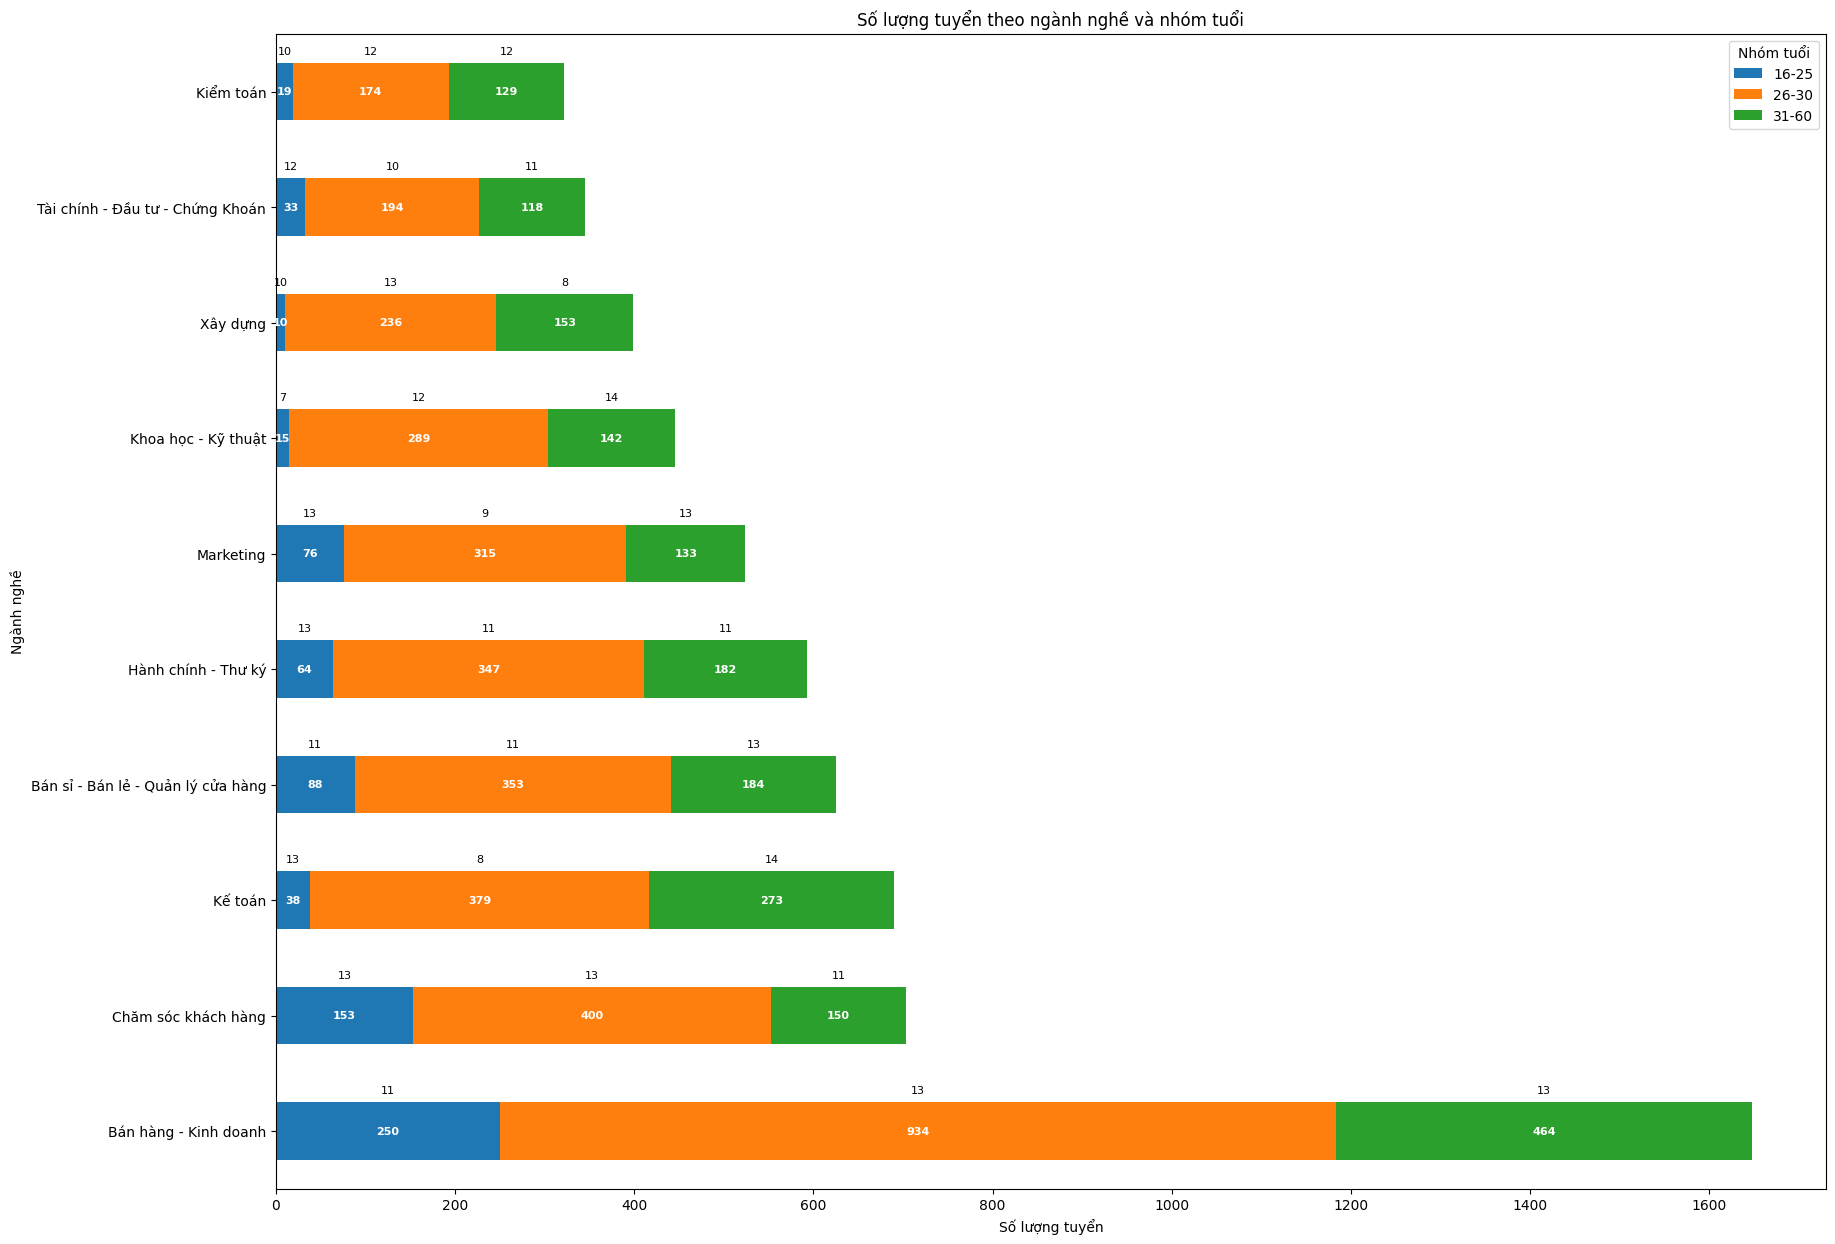

In [32]:
# Tìm 10 ngành có số lượng tuyển nhiều nhất
carreer = df_copy['Ngành nghề'].value_counts().nlargest(10).index
pivot_df_top_10 = pivot_df.loc[carreer]

ax = pivot_df_top_10.plot(kind='barh', stacked=True, figsize=(20,15))


for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{int(width)}'
    label_x = x + width / 2
    label_y = y + height / 2

    if width > 0: 
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8, weight='bold', color='white')


# Tạo bảng pivot để tính lương trung bình cho mỗi ngành nghề và age_group
pivot_df_avg_salary = df_copy.pivot_table(index='Ngành nghề', columns='Nhóm tuổi', values='Mức lương trung bình', aggfunc='mean', fill_value=0)

# Lọc pivot_df_avg_salary để chỉ bao gồm 10 ngành này
pivot_df_avg_salary_top_10 = pivot_df_avg_salary.loc[carreer]

#Biểu diễn lương trên mỗi màu
for i, rect in enumerate(ax.patches):
    industry = carreer[i // len(pivot_df_top_10.columns)]
    age_group = pivot_df_top_10.columns[i % len(pivot_df_top_10.columns)]
    avg_salary = pivot_df_avg_salary_top_10.loc[industry, age_group]
    
    if rect.get_width() > 0:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_y() + rect.get_height()*1.2, f'{int(avg_salary)}', ha='center', va='center', fontsize=8)


plt.title('Số lượng tuyển theo ngành nghề và nhóm tuổi')
plt.xlabel('Số lượng tuyển')
plt.ylabel('Ngành nghề') 
plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">Biểu đồ cho thấy Nhóm tuổi từ 26-30, kế tiếp là từ 31-60, và thấp nhất là nhóm tuổi 16-25. Đồng thời có thể thấy mức lương không chêch lệch quá nhiều</font>

</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">

* Biểu đồ cho thấy giống như biểu đồ về tuyển dụng các ngành ở phần khám phá, ngành <b>Bán hàng - kinh doanh, Hành chính - Thư ký, Chăm sóc khách hàng </b> luôn có số lượng tuyển cao ở các tỉnh.

* Ngành <b>Khách sạn - Nhà hàng - Du lịch </b> xuất hiện ở 4/5 biểu đồ dù không phải nằm trong top 10 ngành có số lượng tuyển nhiều nhất cả nước

* Tại tỉnh <b>Long An</b>, <b> Nghề nghiệp khác</b> chiếm số lượng tuyển khá lớn - Đứng thứ 2 trong toàn bộ số lượng tuyển

* Các ngành nghề <b>Lao động phổ thông, Chăm sóc khách hàng</b> cũng có xuất hiện dù không nằm trong top 10 toàn quốc

</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 5. Cùng một điều kiện, liệu có sự khác biệt trong lương của nam và nữ không? 
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Cho biết liệu có sự phân biệt giới tính nào trong công tác tuyển dụng của các công ty không, nếu có thì cần phải tìm cách khắc phục</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">
* Có 2 bước:

    *  *Bước 1*: Lần lượt tách tất cả các hàng dữ liệu khi tại hàng đó và cột cụ thể có chứa hơn 1 giá trị, ví dụ ở cột `Khu vực tuyển` có các hàng có giá trị là nhiều hơn 1 tỉnh, để làm việc này, nhóm sẽ tách các giá trị ở các hàng trong một cột theo giá trị ngăn cách như `/` hoặc `, `. Sau đó sẽ explode theo cột.

    *  *Bước 2*: Gom nhóm theo các cột dữ liệu `Khu vực tuyển`, `Ngành nghề`, `Cấp bậc`, `Hình thức làm việc`, `Yêu cầu kinh nghiệm`, `Yêu cầu giới tính`, sau đó so sánh mức lương của nam và nữ. Ở đây nhóm sẽ xem xét ở 5 ngành nghề có lượng tuyển nhiều nhất

    * *Bước 3*: Vẽ biểu đồ cột để so sánh<font color="red"></font>

<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">Biểu đồ cột đôi so sánh mức lương của nam và nữ trong cùng một điều kiện ở 5 ngành nghề có số lượng tuyển nhiều nhất</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 1: Tách các cột dữ liệu
</b></font>


</div>

In [33]:
df_exp=df.copy()
df_exp['Yêu cầu giới tính']=df_exp['Yêu cầu giới tính'].replace('Không yêu cầu','Nam, Nữ')
df_exp['Yêu cầu giới tính'] = df_exp['Yêu cầu giới tính'].str.split(', ')
df_exp = df_exp.explode('Yêu cầu giới tính').reset_index(drop=True)
df_exp['Ngành nghề']=df_exp['Ngành nghề'].str.split('/')
df_exp = df_exp.explode('Ngành nghề').reset_index(drop=True)
df_exp['Khu vực tuyển'] = df_exp['Khu vực tuyển'].str.split(', ')
df_exp = df_exp.explode('Khu vực tuyển').reset_index(drop=True)
df_exp=df_exp.groupby(['Khu vực tuyển','Ngành nghề','Cấp bậc','Hình thức làm việc','Yêu cầu bằng cấp','Yêu cầu kinh nghiệm','Yêu cầu giới tính'])['Mức lương trung bình'].mean().reset_index()
df_exp.sample(5)


,Khu vực tuyển,Ngành nghề,Cấp bậc,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Yêu cầu giới tính,Mức lương trung bình
1223,Bình Dương,Xây dựng,Chuyên viên- nhân viên,Toàn thời gian cố định,Cao đẳng,2 năm,Nữ,17.500
8085,TP.HCM,Công nghệ thực phẩm - Dinh dưỡng,Chuyên viên- nhân viên,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Nam,6.500
10750,Tiền Giang,Bán hàng - Kinh doanh,Chuyên viên- nhân viên,Toàn thời gian cố định,Trung học,Chưa có kinh nghiệm,Nam,13.525
10185,TP.HCM,Xây dựng,Chuyên viên- nhân viên,Toàn thời gian cố định,Đại học,2 năm,Nữ,14.200
9314,TP.HCM,Nhân sự,Chuyên viên- nhân viên,Toàn thời gian cố định,Trung cấp,Dưới 1 năm,Nữ,8.000


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 2: Gom nhóm dữ liệu và xem xét lương của nam và nữ ở 5 ngành nghề có số lượng tuyển nhiều nhất
</b></font>


</div>

In [34]:
df_top5 = df_exp[df_exp['Ngành nghề'].isin(carreer_value.head(5)['Ngành nghề'])]


df_male = df_top5[df_top5['Yêu cầu giới tính'] == 'Nam']
df_female = df_top5[df_top5['Yêu cầu giới tính'] == 'Nữ']

average_male_salary = df_male.groupby('Ngành nghề')['Mức lương trung bình'].mean()
average_female_salary = df_female.groupby('Ngành nghề')['Mức lương trung bình'].mean()

average_female_salary_df=average_female_salary.reset_index()
average_female_salary_df


,Ngành nghề,Mức lương trung bình
0,Bán hàng - Kinh doanh,13.090624
1,Bán sỉ - Bán lẻ - Quản lý cửa hàng,13.288988
2,Chăm sóc khách hàng,12.658983
3,Hành chính - Thư ký,10.811160
4,Kế toán,11.023240


In [35]:
average_male_salary_df=average_male_salary.reset_index()
average_male_salary_df

,Ngành nghề,Mức lương trung bình
0,Bán hàng - Kinh doanh,13.411648
1,Bán sỉ - Bán lẻ - Quản lý cửa hàng,13.710948
2,Chăm sóc khách hàng,12.758187
3,Hành chính - Thư ký,10.862683
4,Kế toán,11.478390


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Bước 3: Trực quan hoá
</b></font>


</div>

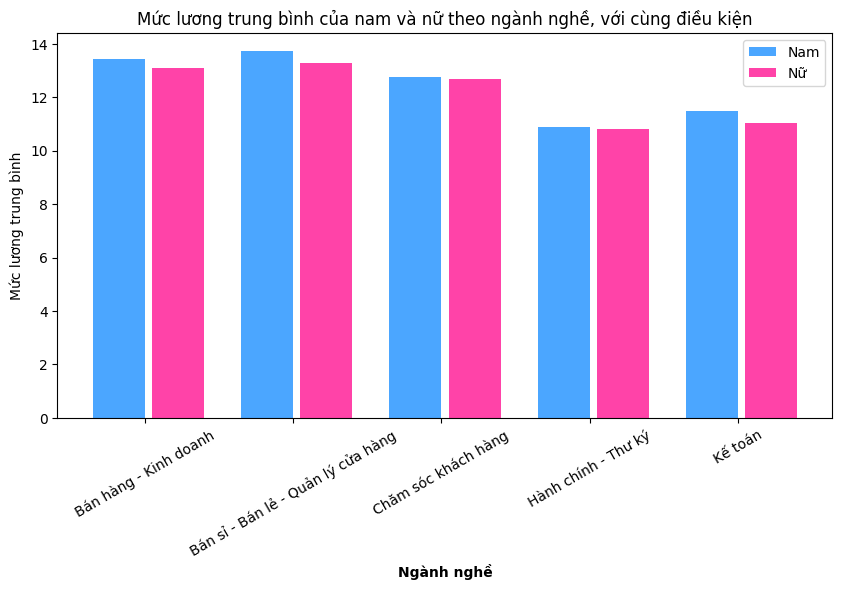

In [36]:
bar_width = 0.35

r1 = np.arange(len(average_male_salary))
r2 = [x + bar_width + 0.05 for x in r1]

plt.figure(figsize=(10, 5))

plt.bar(r1, average_male_salary.values, width=bar_width,color='dodgerblue', alpha=.8, label='Nam')
plt.bar(r2, average_female_salary.values, width=bar_width,color='deeppink',alpha=.8, label='Nữ')

plt.xlabel('Ngành nghề', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(average_male_salary))], average_male_salary.index, rotation=90)

plt.ylabel('Mức lương trung bình')
plt.title('Mức lương trung bình của nam và nữ theo ngành nghề, với cùng điều kiện')
plt.xticks(rotation=30)
plt.legend()
plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Nhận xét:
</b></font>

<font color="red">

* Có thể thấy ở 5 ngành nghề có số lượng tuyển lớn nhất, dù không chênh lệch nhiều, nhưng lương của nam giới cao hơn nữ giới trong cả 5 ngành

* Việc cao hơn trong cả 5 ngành không thể hiện rõ được vấn đề mà câu hỏi đặt ra, nên chúng ta sẽ xem xét tiếp rằng trong các ngành còn lại liệu lương của nam giới có cao hơn nữ giới trong tất cả các ngành không

</font>


</div>

In [37]:
df_male = df_exp[df_exp['Yêu cầu giới tính'] == 'Nam']
df_female = df_exp[df_exp['Yêu cầu giới tính'] == 'Nữ']

average_male_salary = df_male.groupby('Ngành nghề')['Mức lương trung bình'].mean()
average_female_salary = df_female.groupby('Ngành nghề')['Mức lương trung bình'].mean()

all_industries = average_male_salary.index.union(average_female_salary.index)

average_male_salary = average_male_salary.reindex(all_industries, fill_value=0)
average_female_salary = average_female_salary.reindex(all_industries, fill_value=0)

salary_comparison = (average_male_salary > average_female_salary).value_counts()

print('Số lượng ngành nghề nam giới có lương cao hơn nữ giới:', salary_comparison[True])
print('Số lượng ngành nghề nữ giới có lương cao hơn nam giới:', salary_comparison[False])


Số lượng ngành nghề nam giới có lương cao hơn nữ giới: 30
Số lượng ngành nghề nữ giới có lương cao hơn nam giới: 23


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Nhận xét:
</b></font>

<font color="red">

* Vẫn có nhiều ngành nghề mà trong đó lương của nữ giới cao hơn nam giới trong cùng điều kiện tuyển dụng (23/53 ngành, gần một nửa số ngành thu thập được trong dữ liệu). Có thể thấy rằng gần như không có sự phân biệt giới tính trong công việc ngày nay.

</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">

* Ngày nay, phân biệt giới tính trong công việc gần như là không còn tồn tại

</font>


</div>